In [56]:
import scipy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE
from numpy import mean, std
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, mannwhitneyu, norm, entropy
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [261]:
TCGAHealthy = pd.read_pickle('../Data/TCGAHealthy.pkl')
Cancer = pd.read_pickle('../Data/CancerMulti.pkl')
GTEX = pd.read_pickle('../Data/GTEX.pkl')

In [262]:
TCGAHealthy['Target'] = 1

In [263]:
TCGAHealthy['Target'].value_counts()

1    48
Name: Target, dtype: int64

In [264]:
Cancer['Target'] = Cancer['Target'].apply(lambda x: 2 if (x==1) 
                                           else(3 if (x==2) 
                                                else(4 if (x==3) 
                                                     else(5 if (x==4) 
                                                          else(6 if(x==5) 
                                                               else(0 if(x==0) 
                                                                   else 7))))))

In [265]:
Cancer['Target'].value_counts()

6    127
3    122
4     79
5     60
2     38
Name: Target, dtype: int64

In [266]:
data = Cancer.append(GTEX.append(TCGAHealthy))
#data = Cancer.append(GTEX)

In [267]:
data.reset_index(drop = True, inplace = True)

In [268]:
data['Target'].value_counts()

6    127
3    122
0    106
4     79
5     60
1     48
2     38
Name: Target, dtype: int64

In [269]:
data = data.sample(frac=1).reset_index(drop=True)

In [270]:
data

GeneID,CUL5-8065,REV1-51455,ZNF428-126299,CX3CR1-1524,FAXC-84553,PKP2-5318,BNIP2-663,HOXB7-3217,GRIN3A-116443,FCRL5-83416,...,GATA6-2627,COL28A1-340267,PDK3-5165,MC1R-4157,IFT74-80173,CDK14-5218,RP11-762I7.5-0,GSR-2936,UBQLN4-56893,Target
0,142.01,521.76,1369.04,18.70,140.04,77.25,551.56,231.32,82.87,1.13,...,31.90,178.77,33.54,220.32,283.05,83.45,3.47,819.30,518.15,4
1,271.48,525.39,825.00,137.14,201.25,361.04,620.67,25.35,10.08,16.03,...,26.86,110.43,115.16,41.81,220.32,275.28,1.81,1605.83,878.17,3
2,242.88,620.67,1697.45,3.92,204.07,164.42,647.07,22.26,6.36,2.25,...,21.63,438.59,42.11,187.71,262.20,119.26,18.56,1191.69,748.61,3
3,215.77,381.68,1295.13,51.71,403.50,435.55,483.38,43.63,5.77,11.55,...,27.05,48.52,88.88,63.45,269.60,236.21,7.75,1617.00,813.63,3
4,237.86,836.53,1457.23,41.52,262.20,334.46,1015.93,80.01,82.29,1.93,...,45.21,70.51,109.66,170.25,329.84,204.07,15.91,718.08,723.08,6
5,279.14,435.55,1066.48,57.49,575.03,713.11,825.00,140.04,15.34,0.87,...,35.50,193.01,161.02,12.45,158.79,255.00,9.93,2178.83,616.37,0
6,246.28,660.68,1508.65,35.76,221.86,162.14,860.08,57.49,8.19,1.57,...,74.06,194.36,61.25,195.72,232.94,125.24,2.39,1104.13,624.99,6
7,258.57,825.00,1304.15,20.71,223.41,329.84,1167.14,18.16,50.63,5.82,...,28.86,88.88,60.39,52.45,323.03,189.02,8.85,1467.37,854.13,0
8,305.55,543.96,1159.07,60.39,220.32,368.65,1199.98,58.71,9.85,5.77,...,48.52,15.80,70.51,63.45,329.84,125.24,3.63,2591.27,785.88,0
9,212.78,647.07,1111.82,33.30,201.25,212.78,599.49,25.35,12.74,14.45,...,46.84,144.01,100.83,100.13,255.00,161.02,10.47,1651.00,802.41,2


In [240]:
# This is from when groups were used at the start
#data.to_pickle("../Data/ProstateGroups.pkl")

## MI

In [19]:
Prostate = data.copy(deep=True)
Prostate.drop('Target',axis=1, inplace=True)
Target = data['Target']

In [20]:
mic = mutual_info_classif(Prostate,Target)

In [21]:
summary = pd.DataFrame({"MutualInfo":mic,
                       'GeneID':Prostate.columns})

In [22]:
summary.to_pickle("../Data/MI_Grades_NoTCGAH_NoSplit.pkl")

In [23]:
summary = pd.read_pickle("../Data/MI_Grades_NoTCGAH_NoSplit.pkl")

In [271]:
#This has TCGA Healthy in it
summary = pd.read_pickle("../Data/MI_Grades_HealthySplit_NoSplit.pkl")

In [202]:
#This is when MI was based on groups
summary = pd.read_pickle("../Data/MI_Groups_NoSplit.pkl")

In [272]:
top_nosplit = np.hstack([summary.sort_values('MutualInfo',ascending=False).head(500)["GeneID"].values,['Target']])

In [273]:
data = data[top_nosplit]

In [169]:
AllTestPCA = PCA(n_components=580,random_state=42)

In [295]:
AllPCAresult = AllTestPCA.fit(Prostate)

In [296]:
variance = np.cumsum(AllPCAresult.explained_variance_ratio_)

In [297]:
variance = np.insert(variance, 0, 0)

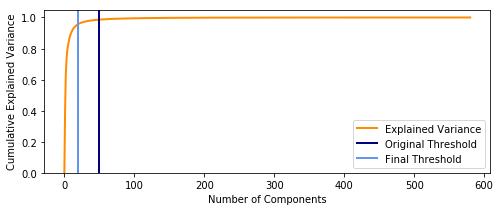

In [301]:
#With TCGA Healthy
fig,ax = plt.subplots(figsize=(8,3))
ax.set_ylim([0,1.05])
plt.plot(variance, color='darkorange',
         lw=2, label='Explained Variance')
plt.xlabel('Number of Components')
plt.axvline(x=(50),c='navy', label="Original Threshold", lw=2)
plt.axvline(x=(20),c='cornflowerblue', label="Final Threshold", lw=2)
plt.ylabel('Cumulative Explained Variance');
plt.legend()

In [274]:
dataReduced1 = PCA(n_components=50).fit_transform(data.drop("Target",axis=1))
dataReduced2 = TSNE(n_components=1).fit_transform(dataReduced1)

In [275]:
Target = data['Target']

In [276]:
dataReduced2 = pd.DataFrame(dataReduced2)

In [277]:
dataReduced2['Target'] = Target

In [134]:
G0Reduced2 = dataReduced2[dataReduced2['Target'] == 0]
G1Reduced2 = dataReduced2[dataReduced2['Target'] == 1]
One = dataReduced2[dataReduced2['Target'] == 2]
Two = dataReduced2[dataReduced2['Target'] == 3]
G3Reduced2 = dataReduced2[dataReduced2['Target'] == 4]
Four = dataReduced2[dataReduced2['Target'] == 5]
Five = dataReduced2[dataReduced2['Target'] == 6]
G2Reduced2 = One.append(Two)
G4Reduced2 = Four.append(Five)
Healthy = G0Reduced2.append(G1Reduced2)
Cancerous = G2Reduced2.append(G3Reduced2.append(G4Reduced2))
ThreeFourFive = G3Reduced2.append(G4Reduced2)
OneTwoThree = G2Reduced2.append(G3Reduced2)

In [135]:
G0Reduced2.reset_index(inplace=True, drop=True)
G1Reduced2.reset_index(inplace=True, drop=True)
G2Reduced2.reset_index(inplace=True, drop=True)
G3Reduced2.reset_index(inplace=True, drop=True)
G4Reduced2.reset_index(inplace=True, drop=True)
Healthy.reset_index(inplace=True, drop=True)
Cancerous.reset_index(inplace=True, drop=True)
OneTwoThree.reset_index(inplace=True, drop=True)
ThreeFourFive.reset_index(inplace=True, drop=True)
One.reset_index(inplace=True, drop=True)
Two.reset_index(inplace=True, drop=True)
Four.reset_index(inplace=True, drop=True)
Five.reset_index(inplace=True, drop=True)

In [136]:
print(G0Reduced2['Target'].value_counts())
print(G1Reduced2['Target'].value_counts())
print(G2Reduced2['Target'].value_counts())
print(G3Reduced2['Target'].value_counts())
print(G4Reduced2['Target'].value_counts())
print(Healthy['Target'].value_counts())
print(Cancerous['Target'].value_counts())
print(ThreeFourFive['Target'].value_counts())
print(OneTwoThree['Target'].value_counts())
print(One['Target'].value_counts())
print(Two['Target'].value_counts())
print(Four['Target'].value_counts())
print(Five['Target'].value_counts())

0    106
Name: Target, dtype: int64
Series([], Name: Target, dtype: int64)
3    122
2     38
Name: Target, dtype: int64
4    79
Name: Target, dtype: int64
6    127
5     60
Name: Target, dtype: int64
0    106
Name: Target, dtype: int64
6    127
3    122
4     79
5     60
2     38
Name: Target, dtype: int64
6    127
4     79
5     60
Name: Target, dtype: int64
3    122
4     79
2     38
Name: Target, dtype: int64
2    38
Name: Target, dtype: int64
3    122
Name: Target, dtype: int64
5    60
Name: Target, dtype: int64
6    127
Name: Target, dtype: int64


In [137]:
TargetG0Reduced2 = G0Reduced2['Target']
TargetOne = One['Target']
G0Reduced2.drop('Target', inplace = True, axis=1)
G1Reduced2.drop('Target', inplace = True, axis=1)
G2Reduced2.drop('Target', inplace = True, axis=1)
G3Reduced2.drop('Target', inplace = True, axis=1)
G4Reduced2.drop('Target', inplace = True, axis=1)
Healthy.drop('Target', inplace = True, axis=1)
Cancerous.drop('Target', inplace = True, axis=1)
ThreeFourFive.drop('Target', inplace = True, axis=1)
OneTwoThree.drop('Target', inplace = True, axis=1)
One.drop('Target', inplace = True, axis=1)
Two.drop('Target', inplace = True, axis=1)
Four.drop('Target', inplace = True, axis=1)
Five.drop('Target', inplace = True, axis=1)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [138]:
G0Reduced2 = G0Reduced2[0]
G1Reduced2 = G1Reduced2[0]
G2Reduced2 = G2Reduced2[0]
G3Reduced2 = G3Reduced2[0]
G4Reduced2 = G4Reduced2[0]
Healthy = Healthy[0]
Cancerous = Cancerous[0]
ThreeFourFive = ThreeFourFive[0]
OneTwoThree = OneTwoThree[0]
One = One[0]
Two = Two[0]
Four = Four[0]
Five = Five[0]

In [319]:
#With TCGA Healthy
exportData = dataReduced2.copy(deep=True)

In [320]:
exportData['Grade'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(1 if (x==1) 
                                                else(2 if (x==2) 
                                                     else(3 if (x==3) 
                                                          else(4 if(x==4) 
                                                               else(5 if(x==5) 
                                                                   else(6 if(x==6)
                                                                        else 7)))))))
exportData['Cancerous'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(0 if (x==1) 
                                                else(1 if (x==2) 
                                                     else(1 if (x==3) 
                                                          else(1 if(x==4) 
                                                               else(1 if(x==5) 
                                                                   else(1 if(x==6)
                                                                        else 2)))))))
exportData['Group'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(1 if (x==1) 
                                                else(2 if (x==2) 
                                                     else(2 if (x==3) 
                                                          else(3 if(x==4) 
                                                               else(4 if(x==5) 
                                                                   else(4 if(x==6)
                                                                        else 5)))))))
exportData['OneTwoThree'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(0 if (x==1) 
                                                else(1 if (x==2) 
                                                     else(1 if (x==3) 
                                                          else(1 if(x==4) 
                                                               else(2 if(x==5) 
                                                                   else(2 if(x==6)
                                                                        else 3)))))))
exportData['ThreeFourFive'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(0 if (x==1) 
                                                else(1 if (x==2) 
                                                     else(1 if (x==3) 
                                                          else(2 if(x==4) 
                                                               else(2 if(x==5) 
                                                                   else(2 if(x==6)
                                                                        else 3)))))))

In [321]:
exportData

,0,Target,Grade,Cancerous,Group,OneTwoThree,ThreeFourFive
0,-22.541437,0,0,0,0,0,0
1,-21.484924,0,0,0,0,0,0
2,-25.611179,3,3,1,2,1,1
3,-15.968430,0,0,0,0,0,0
4,-27.650843,0,0,0,0,0,0
5,-34.468464,0,0,0,0,0,0
6,14.898782,5,5,1,4,2,2
7,-12.919108,3,3,1,2,1,1
8,-22.361483,0,0,0,0,0,0
9,14.539311,2,2,1,2,1,1


In [322]:
exportData.set_index(exportData[0], inplace=True)
exportData.drop([0], inplace=True, axis=1)
exportData.drop('Target', inplace=True, axis=1)

In [323]:
exportData

,Grade,Cancerous,Group,OneTwoThree,ThreeFourFive
0,,,,,
-22.541437,0,0,0,0,0
-21.484924,0,0,0,0,0
-25.611179,3,1,2,1,1
-15.968430,0,0,0,0,0
-27.650843,0,0,0,0,0
-34.468464,0,0,0,0,0
14.898782,5,1,4,2,2
-12.919108,3,1,2,1,1
-22.361483,0,0,0,0,0


In [324]:
#With TCGA Healthy
exportData.to_csv("../Data/exportData.csv")

## Normality Testing

In [255]:
print("GTEx: " + str(mean(G0Reduced2)))
print("TCGA Healthy: " + str(mean(G1Reduced2)))
print("Group 1 (Grade 1 and 2): " + str(mean(G2Reduced2)))
print("Group 2 (Grade 3): " + str(mean(G3Reduced2)))
print("Group 3 (Grade 4 and 5): " + str(mean(G4Reduced2)))

GTEx: -24.649028778076172
TCGA Healthy: -7.367562770843506
Group 1 (Grade 1 and 2): 12.060197830200195
Group 2 (Grade 3): 8.808684349060059
Group 3 (Grade 4 and 5): 2.2347381114959717


In [256]:
print("GTEx: " + str(std(G0Reduced2)))
print("TCGA Healthy: " + str(std(G1Reduced2)))
print("Group 1 (Grade 1 and 2): " + str(std(G2Reduced2)))
print("Group 2 (Grade 3): " + str(std(G3Reduced2)))
print("Group 3 (Grade 4 and 5): " + str(std(G4Reduced2)))

GTEx: 8.079268455505371
TCGA Healthy: 24.409130096435547
Group 1 (Grade 1 and 2): 15.696000099182129
Group 2 (Grade 3): 16.591732025146484
Group 3 (Grade 4 and 5): 17.283369064331055


(0.0, 30.0)

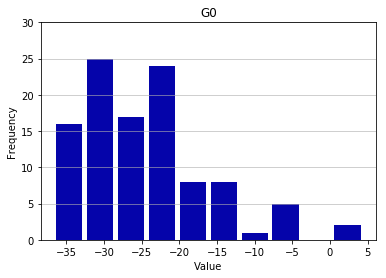

In [257]:
n, bins, patches = plt.hist(x=G0Reduced2, bins='auto', color='#0504aa', rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G0')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

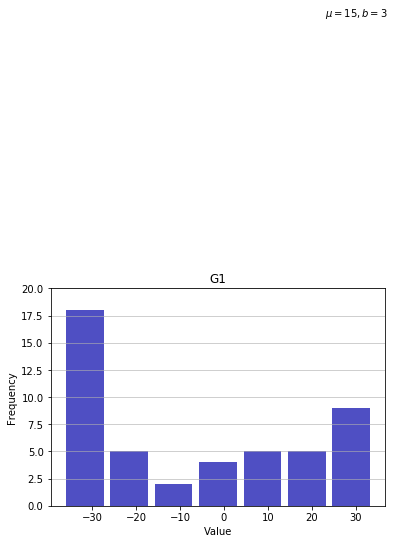

In [325]:
n, bins, patches = plt.hist(x=G1Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G1')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 40.0)

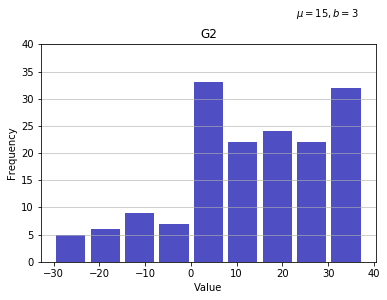

In [183]:
n, bins, patches = plt.hist(x=G2Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G2')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

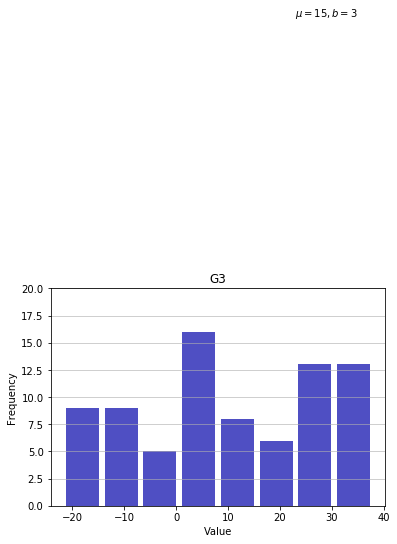

In [184]:
n, bins, patches = plt.hist(x=G3Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G3')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 40.0)

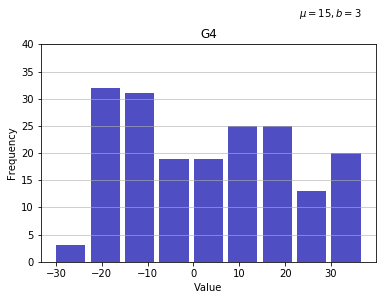

In [185]:
n1, bins1, patches1 = plt.hist(x=G4Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G4')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

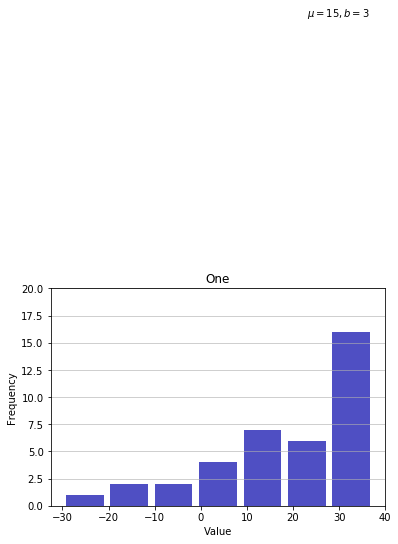

In [186]:
n1, bins1, patches1 = plt.hist(x=One, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('One')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

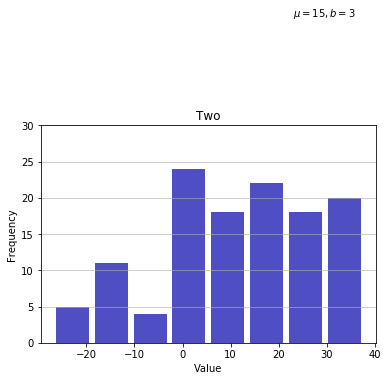

In [187]:
n1, bins1, patches1 = plt.hist(x=Two, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Two')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

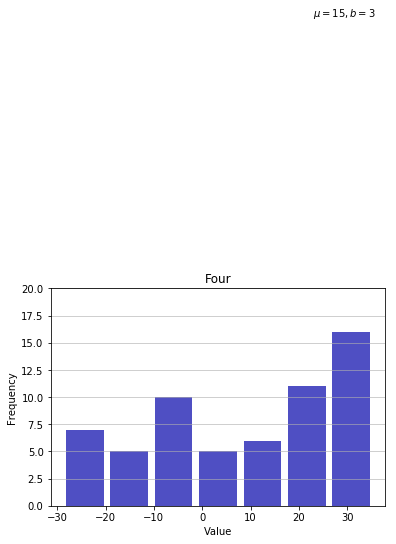

In [84]:
n1, bins1, patches1 = plt.hist(x=Four, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Four')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

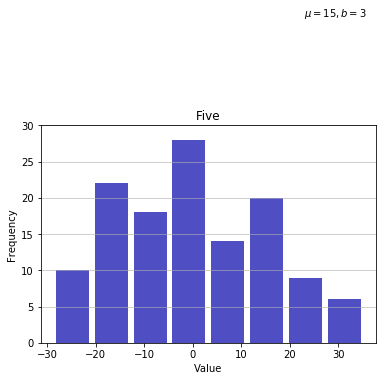

In [85]:
n1, bins1, patches1 = plt.hist(x=Five, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Five')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Healthy vs Cancerous')

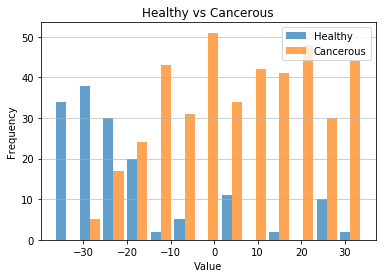

In [258]:
n1, bins1, patches1 = plt.hist([Healthy,Cancerous], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['Healthy', 'Cancerous'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Healthy vs Cancerous')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Group 1 (Grade 1 and 2) vs Grade 3 + Grade 4 + Grade 5')

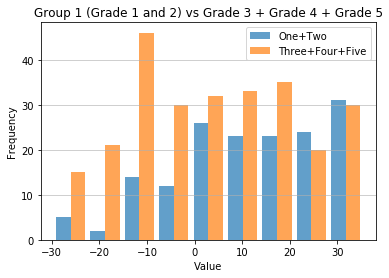

In [259]:
n1, bins1, patches1 = plt.hist([G2Reduced2,ThreeFourFive], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['One+Two', 'Three+Four+Five'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Group 1 (Grade 1 and 2) vs Grade 3 + Grade 4 + Grade 5')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Grade 1 + Grade 2 + Grade 3 vs Group 3(Grade 4 + Grade 5)')

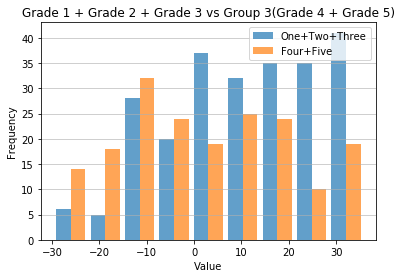

In [260]:
n1, bins1, patches1 = plt.hist([OneTwoThree,G4Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['One+Two+Three', 'Four+Five'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Grade 1 + Grade 2 + Grade 3 vs Group 3(Grade 4 + Grade 5)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Grade 1 vs Grade 5')

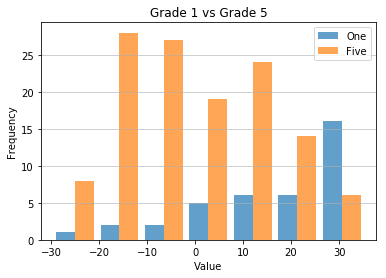

In [261]:
n1, bins1, patches1 = plt.hist([One,Five], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['One', 'Five'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Grade 1 vs Grade 5')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEX vs. (Grade 1 + Grade 2)')

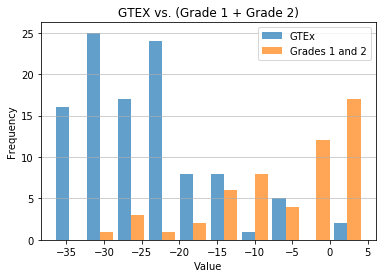

In [346]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G2Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grades 1 and 2'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEX vs. (Grade 1 + Grade 2)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEX vs. Grade 3')

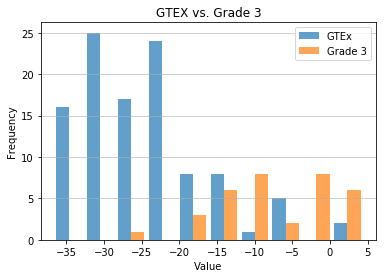

In [347]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G3Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grade 3'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEX vs. Grade 3')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEX vs. (Grade 4 + Grade 5)')

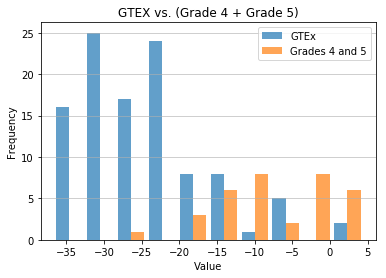

In [348]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G3Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grades 4 and 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEX vs. (Grade 4 + Grade 5)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'(Grade 1 + Grade 2) vs. Grade 3')

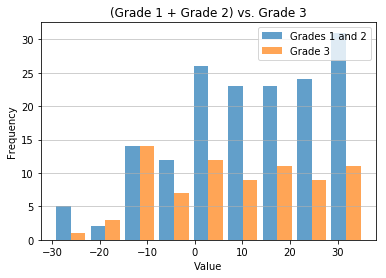

In [349]:
n1, bins1, patches1 = plt.hist([G2Reduced2,G3Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['Grades 1 and 2', 'Grade 3'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('(Grade 1 + Grade 2) vs. Grade 3')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'(Grade 1 + Grade 2) vs. (Grade 4 + Grade 5)')

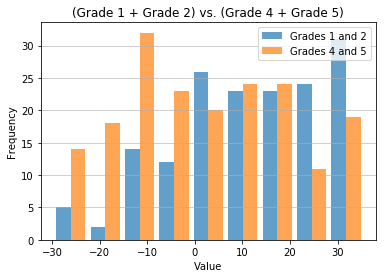

In [350]:
n1, bins1, patches1 = plt.hist([G2Reduced2,G4Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['Grades 1 and 2', 'Grades 4 and 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('(Grade 1 + Grade 2) vs. (Grade 4 + Grade 5)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEx vs TCGA Healthy')

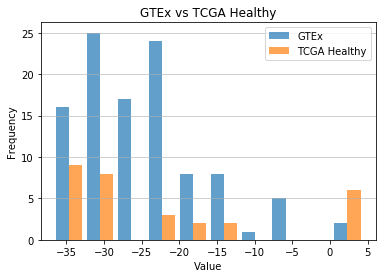

In [345]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G1Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'TCGA Healthy'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEx vs TCGA Healthy')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEx vs Grade 5')

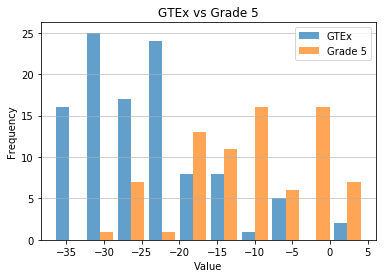

In [343]:
n1, bins1, patches1 = plt.hist([G0Reduced2,Five], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grade 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEx vs Grade 5')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'TCGA Healthy vs Grade 5')

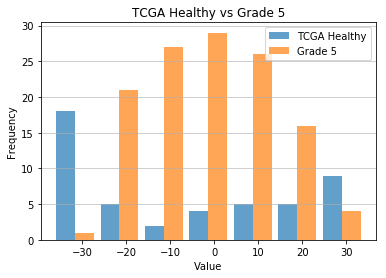

In [344]:
n1, bins1, patches1 = plt.hist([G1Reduced2,Five], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['TCGA Healthy', 'Grade 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('TCGA Healthy vs Grade 5')

### QQ Plot

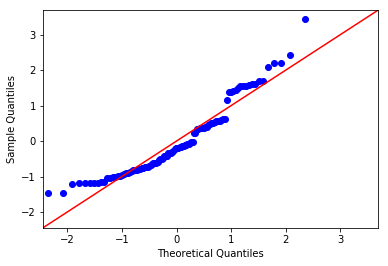

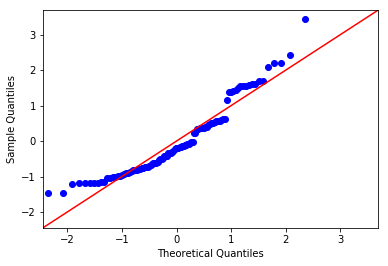

In [90]:
qqplot(G0Reduced2, line = '45', fit = True)

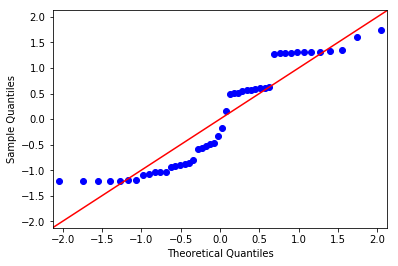

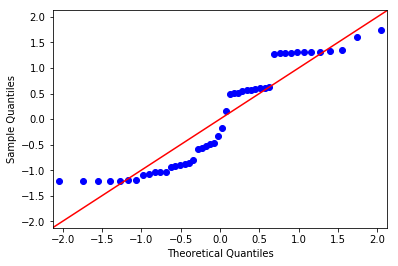

In [91]:
qqplot(G1Reduced2, line = '45', fit = True)

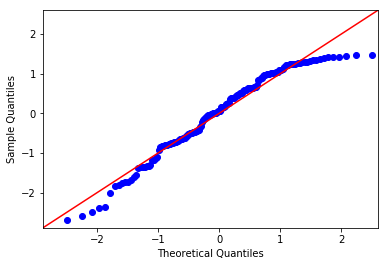

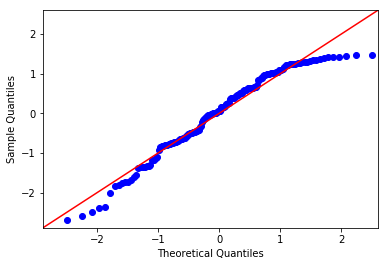

In [92]:
qqplot(G2Reduced2, line = '45', fit = True)

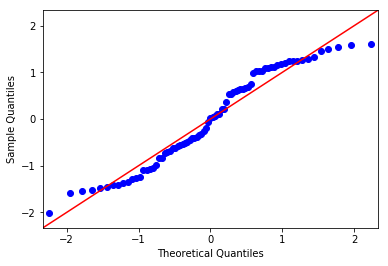

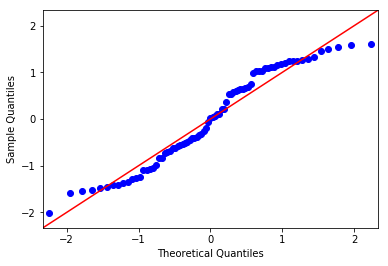

In [93]:
qqplot(G3Reduced2, line = '45', fit = True)

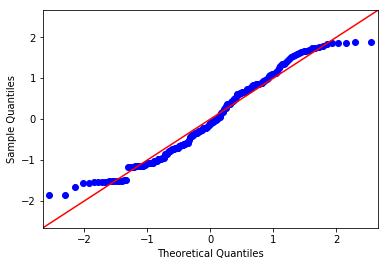

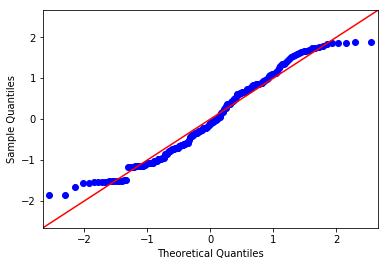

In [94]:
qqplot(G4Reduced2, line = '45', fit = True)

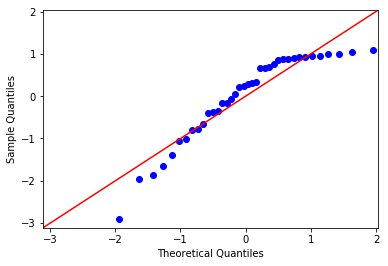

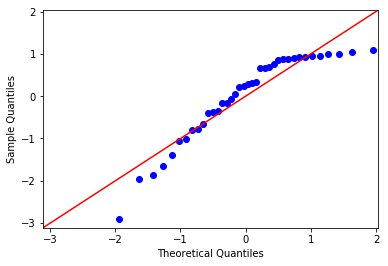

In [95]:
qqplot(One, line = '45', fit = True)

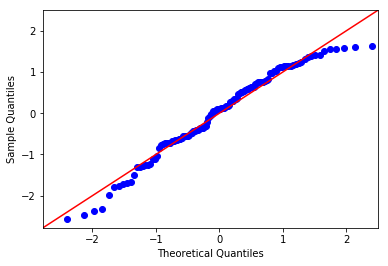

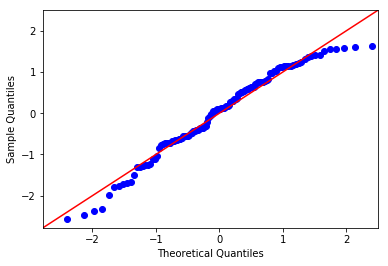

In [96]:
qqplot(Two, line = '45', fit = True)

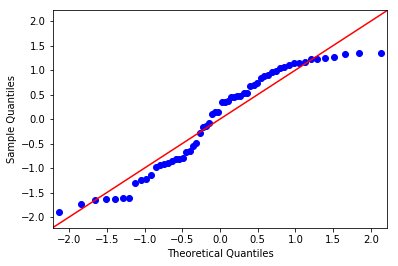

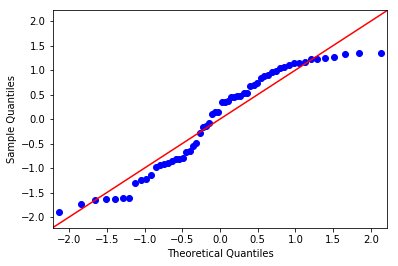

In [97]:
qqplot(Four, line = '45', fit = True)

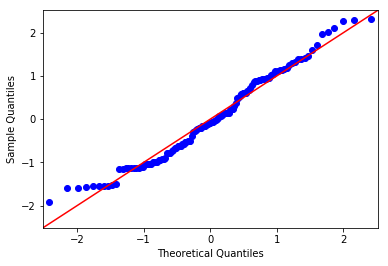

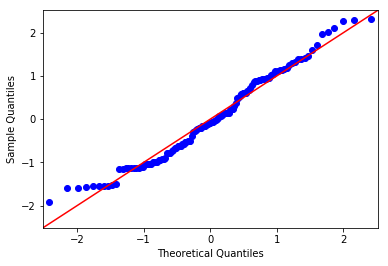

In [98]:
qqplot(Five, line = '45', fit = True)

### Shapiro-Wilk Test

In [263]:
stat, p = shapiro(G0Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.916, p=0.000
Sample does not look Gaussian (reject H0)


In [264]:
stat, p = shapiro(G1Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.864, p=0.000
Sample does not look Gaussian (reject H0)


In [265]:
stat, p = shapiro(G2Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.960, p=0.000
Sample does not look Gaussian (reject H0)


In [266]:
stat, p = shapiro(G3Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.946, p=0.002
Sample does not look Gaussian (reject H0)


In [267]:
stat, p = shapiro(G4Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.966, p=0.000
Sample does not look Gaussian (reject H0)


In [268]:
stat, p = shapiro(One)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.884, p=0.001
Sample does not look Gaussian (reject H0)


In [269]:
stat, p = shapiro(Two)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.973, p=0.014
Sample does not look Gaussian (reject H0)


In [270]:
stat, p = shapiro(Four)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.923, p=0.001
Sample does not look Gaussian (reject H0)


In [271]:
stat, p = shapiro(Five)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.975, p=0.017
Sample does not look Gaussian (reject H0)


Since the GTEX group and some of the others are not gaussian, we will have to use a non-parametric test

## Mann-Whitney U (Comparing all to GTEX)

In [272]:
stat, p = mannwhitneyu(G0Reduced2, G0Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5618.000, p=0.999
Two samples come from the same population (fail to reject H0)


In [273]:
stat, p = mannwhitneyu(G0Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1769.000, p=0.003
A particular population tends to have larger value compared to the other (reject H0)


In [274]:
stat, p = mannwhitneyu(G0Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=478.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [111]:
stat, p = mannwhitneyu(G0Reduced2, G3Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=293.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [112]:
stat, p = mannwhitneyu(G0Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1457.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [113]:
stat, p = mannwhitneyu(G0Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=117.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [114]:
stat, p = mannwhitneyu(G0Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=401.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [115]:
stat, p = mannwhitneyu(G0Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=453.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [116]:
stat, p = mannwhitneyu(G0Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1004.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


## Mann-Whitney U (Comparing All to G1)

In [329]:
stat, p = mannwhitneyu(G1Reduced2, G0Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3319.000, p=0.003
A particular population tends to have larger value compared to the other (reject H0)


In [330]:
stat, p = mannwhitneyu(G1Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1152.000, p=0.997
Two samples come from the same population (fail to reject H0)


In [331]:
stat, p = mannwhitneyu(G1Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2171.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [332]:
stat, p = mannwhitneyu(G1Reduced2, G3Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1153.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [333]:
stat, p = mannwhitneyu(G1Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3352.000, p=0.007
A particular population tends to have larger value compared to the other (reject H0)


In [334]:
stat, p = mannwhitneyu(G1Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=396.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [335]:
stat, p = mannwhitneyu(G1Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1775.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [336]:
stat, p = mannwhitneyu(G1Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=888.000, p=0.001
A particular population tends to have larger value compared to the other (reject H0)


In [337]:
stat, p = mannwhitneyu(G1Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2464.000, p=0.051
Two samples come from the same population (fail to reject H0)


## Mann-Whitney U (Comparing All to G3)

In [275]:
stat, p = mannwhitneyu(G3Reduced2, G0Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=8131.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [276]:
stat, p = mannwhitneyu(G3Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2639.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [277]:
stat, p = mannwhitneyu(G3Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5541.000, p=0.122
Two samples come from the same population (fail to reject H0)


In [278]:
stat, p = mannwhitneyu(G3Reduced2, G3Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3120.500, p=0.999
Two samples come from the same population (fail to reject H0)


In [279]:
stat, p = mannwhitneyu(G3Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=8976.000, p=0.006
A particular population tends to have larger value compared to the other (reject H0)


In [280]:
stat, p = mannwhitneyu(G3Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1024.000, p=0.006
A particular population tends to have larger value compared to the other (reject H0)


In [281]:
stat, p = mannwhitneyu(G3Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=4517.000, p=0.454
Two samples come from the same population (fail to reject H0)


In [282]:
stat, p = mannwhitneyu(G3Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2395.000, p=0.917
Two samples come from the same population (fail to reject H0)


In [283]:
stat, p = mannwhitneyu(G3Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=6581.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


# Comparing all to G2

In [135]:
stat, p = mannwhitneyu(G2Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=12800.000, p=1.000
Two samples come from the same population (fail to reject H0)


In [136]:
stat, p = mannwhitneyu(G2Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=19925.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [137]:
stat, p = mannwhitneyu(G2Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2368.000, p=0.034
A particular population tends to have larger value compared to the other (reject H0)


In [138]:
stat, p = mannwhitneyu(G2Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=10432.000, p=0.322
Two samples come from the same population (fail to reject H0)


In [139]:
stat, p = mannwhitneyu(G2Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5263.000, p=0.271
Two samples come from the same population (fail to reject H0)


In [140]:
stat, p = mannwhitneyu(G2Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=14662.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


# Comparing All to G4

In [141]:
stat, p = mannwhitneyu(G4Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1831.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [142]:
stat, p = mannwhitneyu(G4Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=8164.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [143]:
stat, p = mannwhitneyu(G4Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=4594.000, p=0.035
A particular population tends to have larger value compared to the other (reject H0)


In [144]:
stat, p = mannwhitneyu(G4Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=12890.500, p=0.198
Two samples come from the same population (fail to reject H0)


# Comparing all to One

In [145]:
stat, p = mannwhitneyu(One, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2990.000, p=0.007
A particular population tends to have larger value compared to the other (reject H0)


In [146]:
stat, p = mannwhitneyu(One, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1458.000, p=0.021
A particular population tends to have larger value compared to the other (reject H0)


In [147]:
stat, p = mannwhitneyu(One, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3817.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


# Comparing all to Two

In [148]:
stat, p = mannwhitneyu(Two, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3805.000, p=0.665
Two samples come from the same population (fail to reject H0)


In [149]:
stat, p = mannwhitneyu(Two, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=10845.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


# Comparing All to Four

In [150]:
stat, p = mannwhitneyu(Four, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=4826.000, p=0.003
A particular population tends to have larger value compared to the other (reject H0)


# Miscellaneous

In [284]:
stat, p = mannwhitneyu(OneTwoThree, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=28851.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [285]:
stat, p = mannwhitneyu(G2Reduced2, ThreeFourFive, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=26974.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [286]:
stat, p = mannwhitneyu(Healthy, Cancerous, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=8857.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [287]:
stat, p = mannwhitneyu(G0Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1769.000, p=0.003
A particular population tends to have larger value compared to the other (reject H0)


In [327]:
stat, p = mannwhitneyu(G1Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2464.000, p=0.051
Two samples come from the same population (fail to reject H0)


# K-L Divergence

In [385]:
resize = SMOTE(random_state=42, sampling_strategy={0:5000,1:5000, 2:5000, 3:5000, 4:5000, 5:5000, 6:5000})
dataReduced2Res, TargetRes = resize.fit_resample(dataReduced2, Target)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #6 -> 127)
  n_samples_majority))
/Users/martincasey/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #6 -> 127)
  n_samples_majority))
/Users/martincasey/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5000) in class 2 will be larger than the number of samples in the majority class (class #6 -> 127)
  n_samples_majority))
/Users/martincasey/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5000) in class 3 will be larger than t

In [386]:
dataReduced2Res = pd.DataFrame(dataReduced2Res)

In [387]:
GTEX = dataReduced2Res[dataReduced2Res[1] == 0]
TCGA = dataReduced2Res[dataReduced2Res[1] == 1]
One = dataReduced2Res[dataReduced2Res[1] == 2]
Two = dataReduced2Res[dataReduced2Res[1] == 3]
Three = dataReduced2Res[dataReduced2Res[1] == 4]
Four = dataReduced2Res[dataReduced2Res[1] == 5]
Five = dataReduced2Res[dataReduced2Res[1] == 6]

In [388]:
GTEX.drop([1], inplace=True, axis=1)
TCGA.drop([1], inplace=True, axis=1)
One.drop([1], inplace=True, axis=1)
Two.drop([1], inplace=True, axis=1)
Three.drop([1], inplace=True, axis=1)
Four.drop([1], inplace=True, axis=1)
Five.drop([1], inplace=True, axis=1)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avo

In [389]:
GTEX.rename(columns={0: "Exp"}, inplace = True)
TCGA.rename(columns={0: "Exp"}, inplace = True)
One.rename(columns={0: "Exp"}, inplace = True)
Two.rename(columns={0: "Exp"}, inplace = True)
Three.rename(columns={0: "Exp"}, inplace = True)
Four.rename(columns={0: "Exp"}, inplace = True)
Five.rename(columns={0: "Exp"}, inplace = True)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [360]:
GTEX.sort_values(by = 'Exp', inplace = True)
TCGA.sort_values(by = 'Exp', inplace = True)
One.sort_values(by = 'Exp', inplace = True)
Two.sort_values(by = 'Exp', inplace = True)
Three.sort_values(by = 'Exp', inplace = True)
Four.sort_values(by = 'Exp', inplace = True)
Five.sort_values(by = 'Exp', inplace = True)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avo

In [390]:
GTEX.reset_index(inplace=True, drop=True)
TCGA.reset_index(inplace=True, drop=True)
One.reset_index(inplace=True, drop=True)
Two.reset_index(inplace=True, drop=True)
Three.reset_index(inplace=True, drop=True)
Four.reset_index(inplace=True, drop=True)
Five.reset_index(inplace=True, drop=True)

In [391]:
GTEX = GTEX['Exp'].values
TCGA = TCGA['Exp'].values
One = One['Exp'].values
Two = Two['Exp'].values
Three = Three['Exp'].values
Four = Four['Exp'].values
Five = Five['Exp'].values

In [384]:
Cancer = np.concatenate((One,Two, Three, Four, Five))

In [329]:
Cancer.sort()

## GTEX Comparisons

#### Compare GTEx with Grades

In [392]:
entropy(pk=(GTEX + 50), qk=(Cancer + 50))

0.10442265101802413

In [393]:
entropy(pk=(GTEX + 50), qk=(TCGA + 50))

0.10900131884386038

In [394]:
entropy(pk=(TCGA + 50), qk=(Cancer + 50))

0.1889635492780176

In [395]:
entropy(pk=(GTEX + 50), qk=(One + 50))

0.10398731187285357

In [396]:
entropy(pk=(GTEX + 50), qk=(Two + 50))

0.07827899876061559

In [397]:
entropy(pk=(GTEX + 50), qk=(Three + 50))

0.09700662491079592

In [398]:
entropy(pk=(GTEX + 50), qk=(Four + 50))

0.12116331221265157

In [399]:
entropy(pk=(GTEX + 50), qk=(Five + 50))

0.06105764962984152

## Grade 1 Comparisons

In [230]:
entropy(pk=(One + 50), qk=(Two + 50))

0.002721464862519965

In [236]:
entropy(pk=(One + 50), qk=(Three + 50))

0.005239518214016328

In [237]:
entropy(pk=(One + 50), qk=(Four + 50))

0.020387217714079822

In [238]:
entropy(pk=(One + 50), qk=(Five + 50))

0.009839525377885351

## Grade 2 Comparisons

In [240]:
entropy(pk=(Two + 50), qk=(Three + 50))

0.002272732641603027

In [241]:
entropy(pk=(Two + 50), qk=(Four + 50))

0.010312806599381356

In [242]:
entropy(pk=(Two + 50), qk=(Five + 50))

0.0036981568048034645

## Grade 3 Comparisons

In [ ]:
entropy(pk=( + 50), qk=(Two + 50))